In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/kbopitchingdata.csv
data/corona_test.csv
data/corona_train.csv


In [2]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.2/206.2 kB 5.1 MB/s eta 0:00:00


In [2]:
train = pd.read_csv('data/corona_train.csv')
test = pd.read_csv('data/corona_test.csv')

In [4]:
train.head()

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0
1,807936902,World,5023.0,2020,0.635,114.0,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0
2,773590408,World,5612.0,2020,0.710,116.0,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0
3,130466459,World,7580.0,2020,0.958,153.0,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
4,544040446,World,8983.0,2020,1.136,187.0,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129156 entries, 0 to 129155
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id                                   129156 non-null  int64  
 1   Location                             129156 non-null  object 
 2   Weekly Cases                         128943 non-null  float64
 3   Year                                 129156 non-null  int64  
 4   Weekly Cases per Million             128288 non-null  float64
 5   Weekly Deaths                        127898 non-null  float64
 6   Weekly Deaths per Million            127247 non-null  float64
 7   Total Vaccinations                   40270 non-null   float64
 8   People Vaccinated                    38429 non-null   float64
 9   People Fully Vaccinated              36574 non-null   float64
 10  Total Boosters                       19847 non-null   float64
 11  Daily Vaccina

<AxesSubplot:>

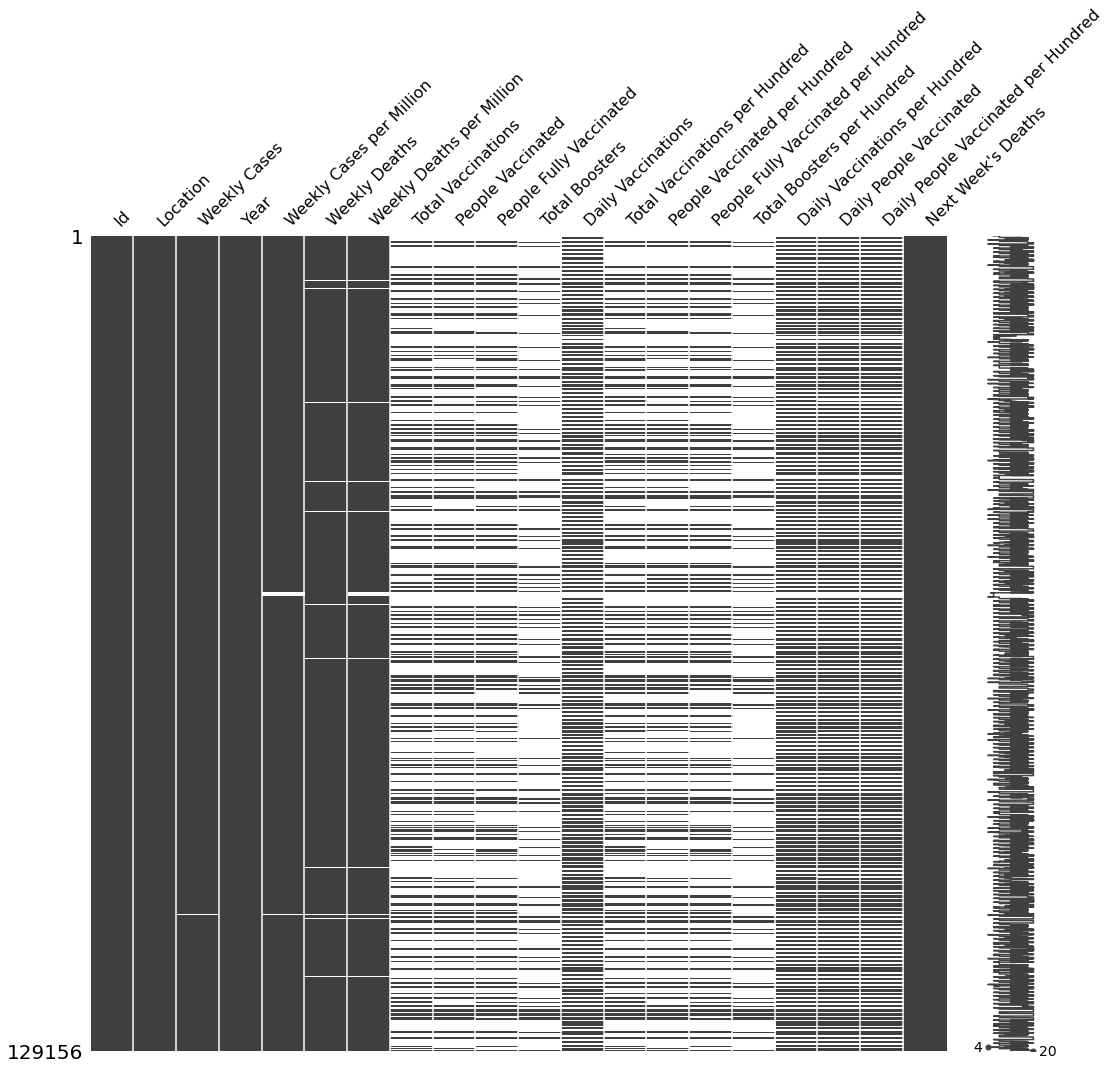

In [6]:
import missingno
missingno.matrix(train.sort_values(by=['Location', 'Year']), figsize = (17,15))

**The ID column has no useful data so can be dropped**

In [7]:
# store ID column from test for later
Id_list = test['Id']

train.drop('Id', axis=1, inplace=True)

In [8]:
nan_cols = train.columns[train.isna().any()].tolist()
n_nan_vals = train[nan_cols].isna().sum()
print(f'Training set missing values:\n{n_nan_vals}')

Training set missing values:
Weekly Cases                              213
Weekly Cases per Million                  868
Weekly Deaths                            1258
Weekly Deaths per Million                1909
Total Vaccinations                      88886
People Vaccinated                       90727
People Fully Vaccinated                 92582
Total Boosters                         109309
Daily Vaccinations                      51316
Total Vaccinations per Hundred          88886
People Vaccinated per Hundred           90727
People Fully Vaccinated per Hundred     92582
Total Boosters per Hundred             109309
Daily Vaccinations per Hundred          51316
Daily People Vaccinated                 51765
Daily People Vaccinated per Hundred     51765
dtype: int64


Quite a lot of nan values to account for

# ***Data Processing***

* Need to turn location from object into int

* Need to normalise year

# Location

Need to change object type of location to a number

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

LABELS = train.columns
encoder = LabelEncoder()

for col in LABELS:
    # check if object 
    if train[col].dtype == 'O':
        train[col] = encoder.fit_transform(train[col])
        test[col] = encoder.transform(test[col])
    else: 
        pass

# If boolean data in table include this as well
#     elif train[col].dtype == 'bool':
#         train[col] = train[col].astype('int')
#         test[col] = test[col].astype('int')

# min max scaling


mm_scaler = MinMaxScaler()
train['Year'] = mm_scaler.fit_transform(train['Year'].to_numpy().reshape(-1,1))
test['Year'] = mm_scaler.transform(test['Year'].to_numpy().reshape(-1,1))

LABELS_SS = []
for i in range(len(LABELS)): 
    if train[LABELS[i]].dtype == 'float64':
        LABELS_SS.append(LABELS[i])

LABELS_SS.remove('Next Week\'s Deaths')

# standard scaling
ss_scaler = StandardScaler()
train[LABELS_SS] = ss_scaler.fit_transform(train[LABELS_SS])
test[LABELS_SS] = ss_scaler.transform(test[LABELS_SS])


In [10]:
test.head()

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
0,719557359,134,-0.150112,0.117730,0.912872,-0.202884,-0.438360,NaN,NaN,NaN,NaN,-0.182799,NaN,NaN,NaN,NaN,0.462395,-0.171701,-0.255599
1,507527289,118,-0.150281,-1.234235,0.154216,-0.202884,-0.438360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,821551528,2,-0.150041,1.469695,-0.323541,-0.202695,-0.424213,NaN,NaN,NaN,NaN,-0.182296,NaN,NaN,NaN,NaN,-0.631605,-0.171354,-0.497994
3,696602016,147,-0.150382,1.469695,-0.343478,-0.202695,-0.436743,NaN,NaN,NaN,NaN,-0.155089,NaN,NaN,NaN,NaN,0.042956,-0.114801,0.615046
4,680387432,74,-0.148772,1.469695,0.502964,-0.202884,-0.438360,-0.23687,-0.237679,-0.228733,NaN,-0.182851,0.417557,0.592392,0.720886,NaN,-0.758446,-0.171702,-0.532622


In [11]:
features = []
for i in range(len(LABELS)):
    if LABELS[i] != "Next Week\'s Deaths" and LABELS[i] != 'Id':
        features.append(LABELS[i])

# prepare train and test datasets for machine learning section
test_X = test[features]
X = train[features]
y = train['Next Week\'s Deaths']

<AxesSubplot:>

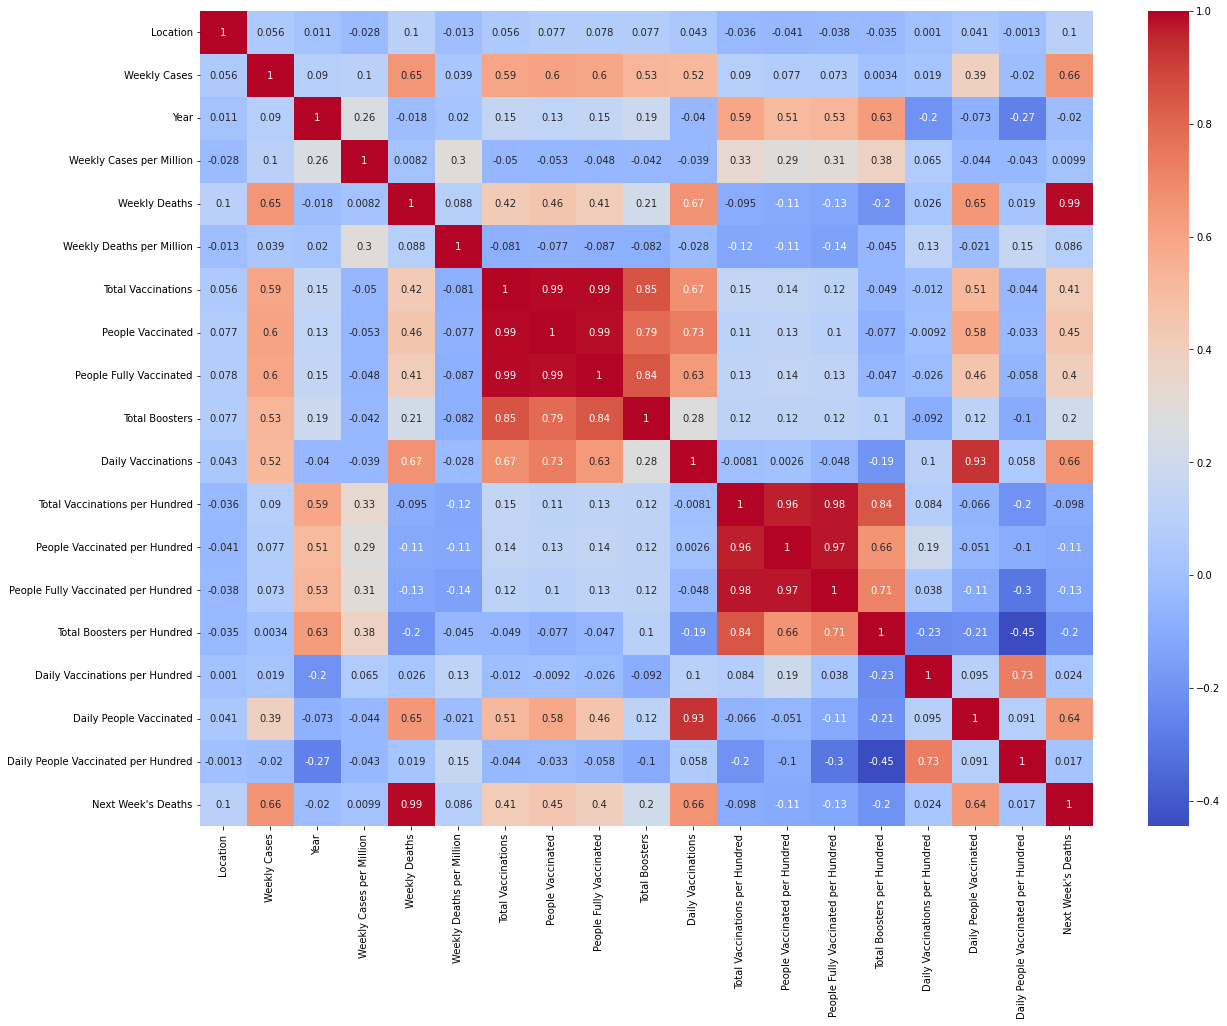

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

# ***Accounting for missing values***

In [13]:
X.head()

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
0,220,-0.146657,-1.234235,-0.343542,-0.190592,-0.438037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,220,-0.142469,-1.234235,-0.343458,-0.181325,-0.437794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,220,-0.141538,-1.234235,-0.343439,-0.180947,-0.437754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,220,-0.138429,-1.234235,-0.343378,-0.173950,-0.437592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,220,-0.136213,-1.234235,-0.343333,-0.167520,-0.437390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lots of NaN data

In [14]:
# Using imputer to estimate values of NaN data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

non_nan_X_train = my_imputer.fit_transform(X)
non_nan_X_test = my_imputer.fit_transform(test_X)

# Put imputed values into DataFrame
X = pd.DataFrame(non_nan_X_train)
test_X = pd.DataFrame(non_nan_X_test)

# ***Machine Learning***

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from flaml import AutoML

/opt/conda/lib/python3.7/site-packages/flaml/searcher/blendsearch.py:14: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
  from ray.tune.suggest import Searcher
/opt/conda/lib/python3.7/site-packages/flaml/searcher/blendsearch.py:15: DeprecationWarning: The module `ray.tune.suggest.optuna` has been moved to `ray.tune.search.optuna` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.optuna` with `ray.tune.search.optuna`.
  from ray.tune.suggest.optuna import OptunaSearch as GlobalSearch
/opt/conda/lib/python3.7/site-packages/flaml/tune/__init__.py:5: DeprecationWarning: The module `ray.tune.sample` has been moved to `ray.tune.search.sample` and the old locati

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [17]:
automl = AutoML()
automl.fit(X_train, y_train, task="regression",metric='mse',time_budget=100)

[flaml.automl: 09-23 10:40:35] {2600} INFO - task = regression
[flaml.automl: 09-23 10:40:35] {2602} INFO - Data split method: uniform
[flaml.automl: 09-23 10:40:35] {2605} INFO - Evaluation method: holdout
[flaml.automl: 09-23 10:40:35] {2727} INFO - Minimizing error metric: mse
[flaml.automl: 09-23 10:40:35] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 09-23 10:40:35] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-23 10:40:35] {3308} INFO - Estimated sufficient time budget=10116s. Estimated necessary time budget=86s.
[flaml.automl: 09-23 10:40:35] {3360} INFO -  at 0.8s,	estimator lgbm's best error=14547910.6652,	best estimator lgbm's best error=14547910.6652
[flaml.automl: 09-23 10:40:35] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-23 10:40:35] {3360} INFO -  at 0.8s,	estimator lgbm's best error=14547910.6652,	best estimator lgbm's best error=14547910.665

# Linear Regression 

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Random Forest
why am i trying to do this with random forest lol that is completely the wrong thing to be using 

In [19]:
# without hyperparameter boosting
# forest_model = RandomForestClassifier(random_state=123)
# forest_model.fit(X_train, y_train)
# pred = forest_model.predict(X_test)

# Predictions

In [20]:
# test_preds = forest_model.predict(test_X)
# test_preds = rf.predict(test_X)
# test_preds_lr = lr.predict(test_X)
test_preds_automl = automl.predict(test_X)

# Accuracy of results and comparing models

In [21]:
train_preds_lr = lr.predict(X_train)
train_preds_automl = automl.predict(X_train)

mae_lr = mean_absolute_error(y_train,train_preds_lr)
print(f'The mean absolute error of the Linear Regression model is: {mae_lr}')

mae_automl = mean_absolute_error(y_train,train_preds_automl)
print(f'The mean absolute error of the automl model is: {mae_automl}')

The mean absolute error of the Linear Regression model is: 156.82148977083637
The mean absolute error of the automl model is: 12.024424308879587


# Submission

In [22]:
submission = pd.DataFrame({'Id': Id_list, 'Next Week\'s Deaths': test_preds_automl})
submission.head()

,Id,Next Week's Deaths
0,719557359,2.770240
1,507527289,2.410864
2,821551528,5.373776
3,696602016,1.911756
4,680387432,4.009555


In [23]:
submission.to_csv("submission.csv", index=False)